In [41]:
import pandas as pd #imorting the neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as plty
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\anime (1).csv") #l;oading the datasets

In [3]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<Axes: >

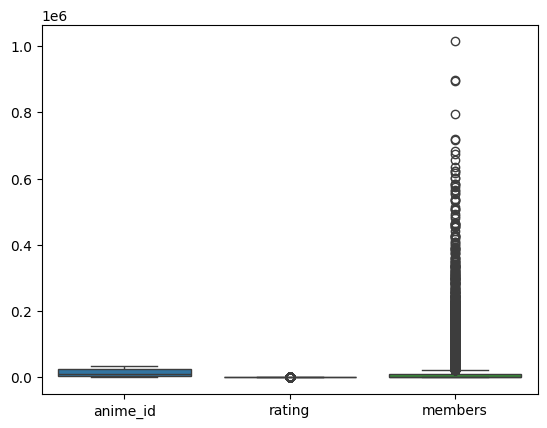

In [5]:
sns.boxplot(df)

In [6]:
df.value_counts() #total values

anime_id  name                                            genre                                                                                       type     episodes  rating  members
34519     Mobile Suit Gakuen: G-Reco Koushien             Comedy                                                                                      Special  9         5.67    94         1
1         Cowboy Bebop                                    Action, Adventure, Comedy, Drama, Sci-Fi, Space                                             TV       26        8.82    486824     1
5         Cowboy Bebop: Tengoku no Tobira                 Action, Drama, Mystery, Sci-Fi, Space                                                       Movie    1         8.40    137636     1
6         Trigun                                          Action, Comedy, Sci-Fi                                                                      TV       26        8.32    283069     1
7         Witch Hunter Robin                           

In [7]:
df["name"].value_counts() 

name
Saru Kani Gassen                               2
Shi Wan Ge Leng Xiaohua                        2
Milky Gal: Cats Ai                             1
Idol Kyousei Sousa                             1
Ikenai Boy                                     1
                                              ..
Hataraku Otona no Renai Jijou The Animation    1
Hi Gekiga Ukiyoe Senya Ichiya                  1
Hitorijime My Hero                             1
Hokenshitsu de Aimashou                        1
Steins;Gate                                    1
Name: count, Length: 12292, dtype: int64

In [8]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [9]:
df["genre"].value_counts()

genre
Hentai                                                         823
Comedy                                                         523
Music                                                          301
Kids                                                           199
Comedy, Slice of Life                                          179
                                                              ... 
Drama, School, Shounen                                           1
Adventure, Drama, Supernatural                                   1
Drama, Music, Romance, School, Shounen                           1
Action, Mecha, Military, School, Sci-Fi, Super Power             1
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen      1
Name: count, Length: 3264, dtype: int64

In [10]:
df["type"].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [11]:
df["episodes"].value_counts()

episodes
1       5677
2       1076
12       816
13       572
26       514
        ... 
1006       1
162        1
132        1
141        1
125        1
Name: count, Length: 187, dtype: int64

In [12]:
df["rating"].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
2.98      1
3.44      1
1.92      1
2.86      1
3.14      1
Name: count, Length: 598, dtype: int64

In [13]:
df["members"].value_counts()

members
60       36
72       36
74       33
62       32
56       31
         ..
5551      1
29463     1
27411     1
57355     1
19984     1
Name: count, Length: 6706, dtype: int64

In [14]:
df.describe() #statisical summaries

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [16]:
df[["genre"]]

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
12289,Hentai
12290,Hentai
12291,Hentai
12292,Hentai


In [17]:
df[["name"]]

,name
0,Kimi no Na wa.
1,Fullmetal Alchemist: Brotherhood
2,Gintama°
3,Steins;Gate
4,Gintama&#039;
...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami
12290,Under World
12291,Violence Gekiga David no Hoshi
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [18]:
df.isnull().sum() #checking for null values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [19]:
df.dropna(inplace=True) #removing null values

In [20]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer #tfidf vectorzer to convert genre to numerical features for cosine similaririties

In [24]:
tfidfs=TfidfVectorizer(stop_words="english")

In [26]:
scores=tfidfs.fit_transform(df["genre"])

In [27]:
similarity_scores=cosine_similarity(scores) #find the cosine similarity

In [31]:
similarity_scores

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]], shape=(12017, 12017))

In [135]:
def animes_recomendation(titles,threshold): #function to find the recomendation sytems
    if titles not in df["name"].values:
        print("given animes name is not found ")
        return
    animes_index=df[df['name'] == titles].index[0]
    animes_similar=pd.Series(similarity_scores[animes_index],index=df.index)
    animes_similar=animes_similar[(animes_similar>=threshold)&(animes_similar!=animes_index)]
    animes_similar=animes_similar.sort_values(ascending=False)
    top_animes=animes_similar.head(20)
    print(f"the top {len(top_animes)} animes are similar to {titles} with threshold>={threshold}")
    print(df.loc[top_animes.index,["name","genre","rating"]])
    return top_animes

In [136]:
animes_recomendation("Sci-Fi, Thriller",0.5)

given animes name is not found 


In [137]:
animes_recomendation("Naruto",0.5) 

the top 20 animes are similar to Naruto with threshold>=0.5
                                                   name  \
615                                  Naruto: Shippuuden   
841                                              Naruto   
2997  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
486                            Boruto: Naruto the Movie   
2458               Naruto Shippuuden: Sunny Side Battle   
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
1343                                        Naruto x UT   
1472        Naruto: Shippuuden Movie 4 - The Lost Tower   
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
7628                            Kyutai Panic Adventure!   
1796                                     Rekka no Honoo   
784          Naruto: Shippuuden Movie 6 - Road to Ninja   
2416  Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...   
4576                  Street Fighter Zero The Animation   
515                              Dragon Ball Kai (2014)

615     1.000000
841     1.000000
2997    1.000000
486     1.000000
2458    1.000000
1573    1.000000
1343    1.000000
1472    1.000000
1103    1.000000
7628    0.980790
1796    0.947418
784     0.947418
2416    0.947418
4576    0.943540
515     0.936740
1930    0.936740
588     0.936740
4314    0.936740
5999    0.936740
1409    0.936740
dtype: float64

In [140]:
animes_recomendation("Naruto",0.9)

the top 20 animes are similar to Naruto with threshold>=0.9
                                                   name  \
486                            Boruto: Naruto the Movie   
841                                              Naruto   
615                                  Naruto: Shippuuden   
1472        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343                                        Naruto x UT   
2997  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
2458               Naruto Shippuuden: Sunny Side Battle   
7628                            Kyutai Panic Adventure!   
2416  Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...   
1796                                     Rekka no Honoo   
784          Naruto: Shippuuden Movie 6 - Road to Ninja   
4576                  Street Fighter Zero The Animation   
206                                       Dragon Ball Z

486     1.000000
841     1.000000
615     1.000000
1472    1.000000
1573    1.000000
1103    1.000000
1343    1.000000
2997    1.000000
2458    1.000000
7628    0.980790
2416    0.947418
1796    0.947418
784     0.947418
4576    0.943540
206     0.936740
4314    0.936740
1409    0.936740
588     0.936740
515     0.936740
4275    0.936740
dtype: float64

Analysis

Combine genre similarity  and rating correlation for hybrid results.

need to Add user rating data for collaborative filterings.

need to Use deep learning models like Autoencoders for large datasets.

1.explain the difference between user-based and item-based collaborative filtering?

User-Based CF-Find similar users and recommend what they liked

Find users who behave similarly to the target user.

Recommend items that those similar users liked.

Build a user–item rating matrix

Calculate similarity between users

Cosine similarity / Pearson correlation



Item-Based CF-Find similar items and recommend those items

Recommend items that similar users liked

Find items similar to the item the user has interacted with.

Recommend the most similar items.

Build item–item similarity matrix

Compare items using Cosine similarity

Recommend items with highest similarity score

2.What is collaborative filtering, and how does it work?
Collaborative Filtering recommends items based on user behavior or user-item interactions, not item features.

It uses:

Ratings

Likes

Click history

Watch history

Users who are similar to you liked these items

CF does not look at item features.
Instead, it uses patterns from other users.
